In [1]:
food_types = [
  "breakfast",
  "lunch",
  "dinner",
  "snacks",
  "dessert",
  "drinks",
]

In [94]:
import pandas as pd
import random


class Meal:
  def __init__(self, food_type, id, price=None, cals=None, satisfaction=None):
    self.price = price
    self.cals = cals
    self.satisfaction = satisfaction
    self.food_type = food_type
    self.id = id

  def randomize(self):
    self.price = round(int(random.random() * 8) + 5, 2)
    self.cals = round(int(random.random() * 8) + 5, 2)
    self.satisfaction = round(int(random.random() * 50), 2)
    return self

  def __repr__(self):
    return f"({self.food_type}: {self.price}€ {self.cals}C {self.satisfaction}S)"


dataset = dict()
print("demo dataset:")
for t in food_types:
  dataset[t] = [Meal(t, i).randomize() for i in range(1, random.randint(3, 50))]
  print(dataset[t])



dataset:
[(breakfast: 12€ 7C 18S), (breakfast: 8€ 11C 3S), (breakfast: 12€ 12C 11S), (breakfast: 6€ 5C 48S), (breakfast: 10€ 12C 23S), (breakfast: 7€ 7C 35S), (breakfast: 6€ 12C 10S), (breakfast: 5€ 11C 1S), (breakfast: 10€ 10C 28S), (breakfast: 12€ 10C 39S), (breakfast: 10€ 5C 22S), (breakfast: 5€ 5C 36S), (breakfast: 10€ 7C 48S), (breakfast: 11€ 12C 46S), (breakfast: 10€ 11C 45S), (breakfast: 7€ 11C 44S), (breakfast: 5€ 11C 31S), (breakfast: 12€ 10C 18S), (breakfast: 9€ 8C 32S), (breakfast: 10€ 11C 13S), (breakfast: 9€ 11C 35S), (breakfast: 8€ 8C 2S), (breakfast: 7€ 9C 2S), (breakfast: 7€ 5C 6S), (breakfast: 8€ 5C 38S), (breakfast: 5€ 11C 6S), (breakfast: 11€ 7C 46S), (breakfast: 9€ 12C 45S), (breakfast: 9€ 9C 32S), (breakfast: 9€ 8C 42S), (breakfast: 10€ 10C 46S), (breakfast: 12€ 5C 0S), (breakfast: 9€ 10C 29S), (breakfast: 9€ 11C 34S), (breakfast: 11€ 5C 0S), (breakfast: 6€ 12C 35S), (breakfast: 9€ 12C 20S), (breakfast: 9€ 7C 3S), (breakfast: 5€ 9C 21S)]
[(lunch: 6€ 9C 39S), (lunch

In [3]:
def knapsack(dataset, food_types, budget, max_cals):
  dp = dict()
  new_dp = dict()

  for m1 in dataset[food_types[0]]:
    if m1.satisfaction > dp.get((m1.price, m1.cals), [0])[0]:
      dp[(m1.price, m1.cals)] = [m1.satisfaction, [m1]]

  for food_type in food_types[1:]:
    for new_food in dataset[food_type]:
      for (price, cals), (satisfaction, meals_list) in dp.items():

        new_price = price + new_food.price
        new_cals = cals + new_food.cals

        if new_price > budget or new_cals > max_cals:
          continue

        new_satisfaction = satisfaction + new_food.satisfaction

        key = (new_price, new_cals)
        if key not in new_dp or new_dp[key][0] < new_satisfaction:
          new_meals = meals_list + [new_food]
          new_dp[key] = [new_satisfaction, new_meals]

    dp = new_dp
    new_dp = dict()
  return dp

In [4]:
def bruteforce(dataset, food_types, out, budget, max_cals, id=0, total_constraints=None, satisf=0, menu=None):
  if menu is None:
    return bruteforce(dataset, food_types, out, budget, max_cals, 0, (0, 0), 0, [])

  if total_constraints[0] > budget or total_constraints[1] > max_cals:
    return

  if id == len(food_types):
    if total_constraints not in out or out[total_constraints][0] < satisf:
      out[total_constraints] = [satisf, menu[::]]
    return

  for food in dataset[food_types[id]]:
    bruteforce(dataset,
               food_types,
               out,
               budget,
               max_cals,
               id+1,
     (total_constraints[0] + food.price, total_constraints[1] + food.cals),
               satisf + food.satisfaction,
               menu + [food])

In [107]:
import time
import tqdm
plt_data = []
dataset_sizes = list(range(1, 18))

dataset = dict()
for t in food_types:
  dataset[t] = []

for dataset_size in tqdm.tqdm(dataset_sizes):
  budget = 60
  max_cals = 60

  for t in food_types:
    dataset[t].append(Meal(t, dataset_size).randomize())

  ans1 = dict()

  t1 = time.time()
  bruteforce(dataset, food_types, ans1, budget, max_cals)
  t1 = time.time() - t1

  t2 = time.time()
  ans2 = knapsack(dataset, food_types, budget, max_cals)
  t2 = time.time() - t2

  plt_data.append((dataset_size, t1, t2))
  assert ans1.keys() == ans2.keys()

100%|████████████████████████████████████████| 17/17 [00:28<00:00,  1.69s/it]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


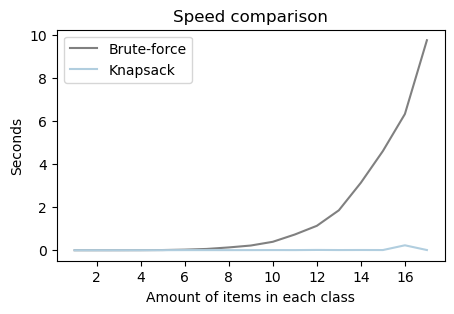

In [109]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (5,3)

plt.plot([x[0] for x in plt_data], [x[1] for x in plt_data], label="Brute-force", color=(.5,.5,.5))
plt.plot([x[0] for x in plt_data], [x[2] for x in plt_data], label="Knapsack", color=(177/255, 206/255, 223/255))
plt.xlabel("Amount of items in each class")
plt.ylabel("Seconds taken")
plt.title("Speed comparison")
plt.legend()
plt.savefig('graph1.eps', format='eps')
plt.show()

In [98]:
import time
import tqdm
plt_data2 = []

dataset = dict()
for t in food_types:
  dataset[t] = []

max_n = 100
max_size = 100
tries = 3
for dataset_size in tqdm.tqdm(list(range(max_size))):

  for t in food_types:
    dataset[t].append(Meal(t, dataset_size).randomize())

  plt_data2.append([])
  for n in range(max_n):
    budget = n
    max_cals = n

    ts = []

    for _ in range(tries):
      t = time.time()
      ans2 = knapsack(dataset, food_types, budget, max_cals)
      ts.append(time.time() - t)
    t = min(ts)

    plt_data2[-1].append((t, dataset_size, n))
    #print(n, t1, t2)

100%|██████████████████████████████████████| 100/100 [11:48<00:00,  7.09s/it]


100 100
1.6689300537109375e-06 0.08702230453491211


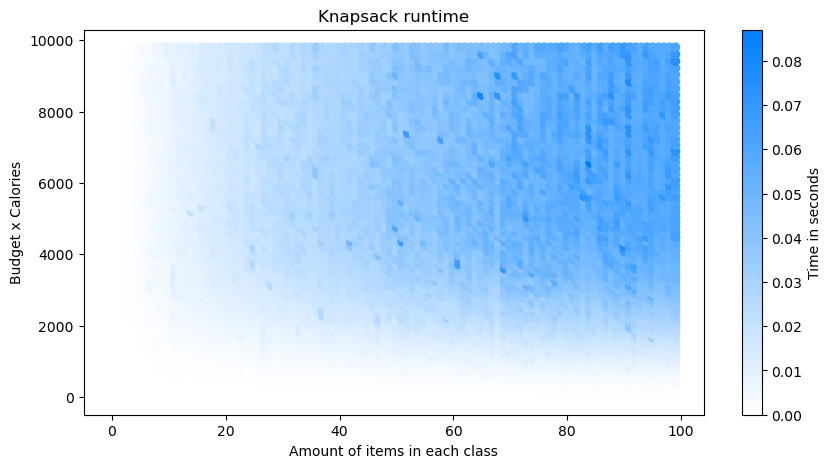

In [101]:
from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import numpy as np

print(len(plt_data2), len(plt_data2[0]))

plt.rcParams["figure.figsize"] = (10,5)

min_time = min(min(a[0] for a in x) for x in plt_data2)
max_time = max(max(a[0] for a in x) for x in plt_data2)
d = max_time - min_time
print(min_time, max_time)

x = []
y = []
colors = []

for i in range(0, len(plt_data2)):
  for j in range(0, len(plt_data2[0])):

    t, dataset_size, n = plt_data2[i][j]
    x.append(dataset_size)
    y.append(n**2)

    val = (t - min_time) / d
    #colors.append((0.4, 0.3, 0.5 + val*0.5))
    colors.append((1-val, 1-val/2, 1))

cmap = mcolors.LinearSegmentedColormap.from_list("my_colormap", list((1-val, 1-val/2, 1) for val in np.arange(0, 1, 0.0001)))
cmappable = ScalarMappable(norm=Normalize(0,max_time), cmap=cmap)

plt.scatter(x, y, color=colors)
plt.xlabel("Amount of items in each class")
plt.ylabel("Budget x Calories")
plt.title("Knapsack runtime")

c = plt.colorbar(cmappable, ax=plt.gca())
c.ax.set_ylabel('Time in seconds')

plt.savefig('graph2.eps', format='eps')
plt.show()

In [ ]:
ds = {
  "breakfast": [Meal("Apple", 0, price=1, cals=95, satisfaction=3), Meal("Banana", 0, price=1, cals=105, satisfaction=4), Meal("Porridge", 0, price=1, cals=330, satisfaction=4)],
  "lunch": [Meal("Soup", 0, price=2, cals=147, satisfaction=6), Meal("Chicken Sandwich", 0, price=2, cals=368, satisfaction=8)],
  "dinner": [Meal("Risoto", 0, price=4, cals=540, satisfaction=10), Meal("Instant Noodles", 0, price=1, cals=248, satisfaction=3)],
  "snacks": [Meal("Cookies", 0, price=3, cals=630, satisfaction=9), Meal("Gummy Sweets", 0, price=2, cals=369, satisfaction=6)],
  "dessert": [Meal("Cake", 0, price=5, cals=510, satisfaction=8), Meal("Muffin", 0, price=2, cals=350, satisfaction=5)],
  "drinks": [Meal("Orange Juice", 0, price=2, cals=245, satisfaction=3), Meal("Water", 0, price=0, cals=0, satisfaction=1)],
}

budget = 11
max_cals = 2000

ans = knapsack(ds, food_types, budget, max_cals)

print(ans)

for (price, cals), (satisfaction, meals_list) in sorted(ans.items(), key=lambda x: x[0]):
  if satisfaction < 32:
    continue
  print(f"{price}€, {cals}C satisf: {satisfaction}, with meals {meals_list}")


{(11, 1715): [29, [(Apple: 1€ 95C 3S), (Soup: 2€ 147C 6S), (Instant Noodles: 1€ 248C 3S), (Cookies: 3€ 630C 9S), (Muffin: 2€ 350C 5S), (Orange Juice: 2€ 245C 3S)]], (11, 1725): [30, [(Banana: 1€ 105C 4S), (Soup: 2€ 147C 6S), (Instant Noodles: 1€ 248C 3S), (Cookies: 3€ 630C 9S), (Muffin: 2€ 350C 5S), (Orange Juice: 2€ 245C 3S)]], (11, 1950): [30, [(Porridge: 1€ 330C 4S), (Soup: 2€ 147C 6S), (Instant Noodles: 1€ 248C 3S), (Cookies: 3€ 630C 9S), (Muffin: 2€ 350C 5S), (Orange Juice: 2€ 245C 3S)]], (11, 1936): [31, [(Apple: 1€ 95C 3S), (Chicken Sandwich: 2€ 368C 8S), (Instant Noodles: 1€ 248C 3S), (Cookies: 3€ 630C 9S), (Muffin: 2€ 350C 5S), (Orange Juice: 2€ 245C 3S)]], (11, 1946): [32, [(Banana: 1€ 105C 4S), (Chicken Sandwich: 2€ 368C 8S), (Instant Noodles: 1€ 248C 3S), (Cookies: 3€ 630C 9S), (Muffin: 2€ 350C 5S), (Orange Juice: 2€ 245C 3S)]], (10, 1454): [26, [(Apple: 1€ 95C 3S), (Soup: 2€ 147C 6S), (Instant Noodles: 1€ 248C 3S), (Gummy Sweets: 2€ 369C 6S), (Muffin: 2€ 350C 5S), (Orange 